<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/PDSH-cover-small.png?raw=1">

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

**[Version complète en Français]**

# Scikit-Learn : Analyse en composantes principales

Retrouver l'introduction complète à scikit learn ici [Introducing Scikit-Learn](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.02-Introducing-Scikit-Learn.ipynb)

### Données sous forme de tableau

Un tableau est une grille de données à deux dimensions, dans laquelle les lignes représentent les éléments individuels de l'ensemble de données et les colonnes représentent les quantités liées à chacun de ces éléments.
Prenons par exemple l'[ensemble de données Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set), célèbre analyse par Ronald Fisher en 1936.
Nous pouvons télécharger ce jeu de données sous la forme d'un ``DataFrame`` Pandas en utilisant la bibliothèque [seaborn](http://seaborn.pydata.org/) :

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Ici, chaque ligne des données fait référence à une seule fleur observée, et le nombre de lignes est le nombre total de fleurs dans l'ensemble de données.
En général, nous désignerons les lignes de la matrice par *échantillons* et le nombre de lignes par ``n_échantillons``.

De même, chaque colonne de données fait référence à une information quantitative particulière qui décrit chaque échantillon.
En général, nous désignerons les colonnes de la matrice par *features*, et le nombre de colonnes par ``n_features``.

### Exemple d'apprentissage non supervisé : la dimensionnalité de l'iris

Comme exemple de problème d'apprentissage non supervisé, regardons comment réduire la dimensionnalité des données Iris afin de les visualiser plus facilement.
Rappelez-vous que les données Iris sont en quatre dimensions : il y a quatre caractéristiques enregistrées pour chaque échantillon.

La tâche de la réduction de dimensionnalité est de se demander s'il existe une représentation de dimension inférieure appropriée qui conserve les caractéristiques essentielles des données.
Souvent, la réduction de dimensionnalité est utilisée comme aide à la visualisation des données : après tout, il est beaucoup plus facile de tracer des données en deux dimensions qu'en quatre dimensions ou plus !

Ici, nous utiliserons l'analyse en composantes principales (ACP ; voir Seconde Partie), qui est une technique de réduction de dimensionnalité linéaire rapide.
Nous allons demander au modèle de renvoyer deux composants, c'est-à-dire une représentation bidimensionnelle des données.

En suivant la séquence d'étapes décrites ci-dessous, nous avons :


In [2]:
from sklearn.decomposition import PCA  # 1. Choisir la classe du modèle
model = PCA(n_components=2)            # 2. Instancier le modèle avec des hyperparamètres
model.fit(X_iris)                      # 3. Adapter aux données. Pas de y spécifié ici!
X_2D = model.transform(X_iris)         # 4. Transformer les données à deux dimensions

Traçons maintenant les résultats. Un moyen rapide de le faire est d'insérer les résultats dans le ``DataFrame`` original d'Iris et d'utiliser le ``lmplot`` de Seaborn pour afficher les résultats :

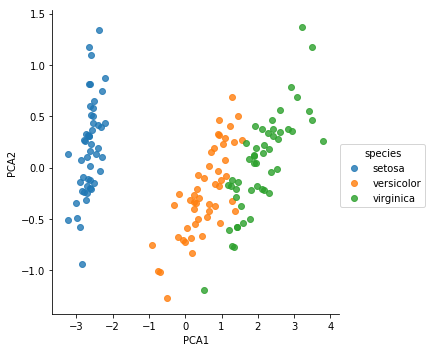

In [3]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

On voit que dans la représentation bidimensionnelle, les espèces sont assez bien séparées, même si l'algorithme PCA n'avait aucune connaissance des labels d'espèces !
Cela nous indique qu'une classification relativement simple sera probablement efficace sur l'ensemble de données.

#  En profondeur : Analyse en composantes principales

Ici, nous commençons à examiner les estimateurs non supervisés, qui peuvent mettre en évidence des aspects intéressants des données sans référence à des étiquettes connues.

Dans cette section, nous explorons ce qui est peut-être l'un des algorithmes non supervisés les plus largement utilisés, l'analyse en composantes principales (ACP).
L'ACP est fondamentalement un algorithme de réduction de dimensionnalité, mais il peut également être utile comme outil de visualisation, de filtrage du bruit, d'extraction et d'ingénierie de caractéristiques, et bien plus encore.
Après une brève discussion conceptuelle de l'algorithme PCA, nous verrons quelques exemples de ces autres applications.

Nous commençons par les importations standard :

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Présentation de l'analyse en composantes principales

L'analyse en composantes principales est une méthode non supervisée rapide et flexible pour la réduction de la dimensionnalité des données, que nous avons brièvement vue dans la Première Partie.
Son comportement est plus facile à visualiser en examinant un ensemble de données à deux dimensions.

Considérez les 200 points suivants :

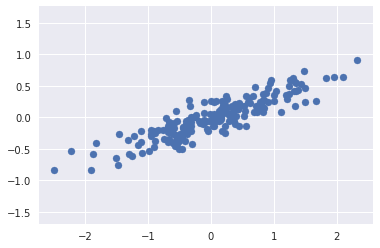

In [5]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

À vue d'œil, il est clair qu'il existe une relation presque linéaire entre les variables x et y.
Le problème d'apprentissage non supervisé tente d'apprendre la *relation* entre les valeurs x et y.

Dans l'analyse en composantes principales, cette relation est quantifiée en trouvant une liste des *axes principaux* dans les données et en utilisant ces axes pour décrire l'ensemble de données.

En utilisant l'estimateur ``PCA`` de Scikit-Learn, nous pouvons calculer cela comme suit :


In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

L'ajustement "Fit" apprend certaines quantités à partir des données, surtout les "composantes" et la "variance expliquée":

In [7]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [8]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


Pour voir ce que signifient ces nombres, visualisons-les sous forme de vecteurs sur les
données d'entrées, en utilisant les "composantes" pour définir la direction du vecteur, et la "variance expliquée" pour définir la longueur au carré du vecteur :

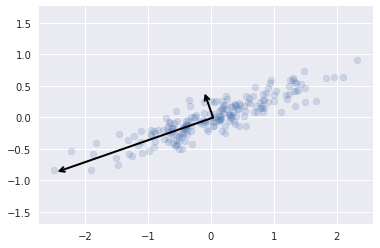

In [9]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

Ces vecteurs représentent les * axes principaux * des données, et la longueur du vecteur est une indication de l'importance de cet axe dans la description de la distribution des données - plus précisément, il s'agit d'une mesure de la variance des données lorsqu'il est projeté sur cet axe.
La projection de chaque point de données sur les axes principaux sont les "composantes principales" des données.

Si nous traçons ces composants principaux à côté des données d'origine, nous voyons les tracés présentés ici :

#### Code caché

In [10]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

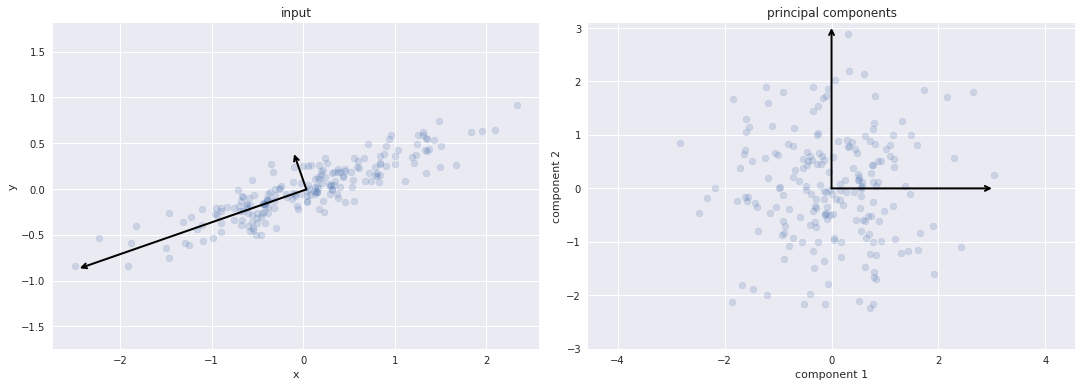

In [11]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))

fig.savefig('figures/05.09-PCA-rotation.png')

#### ... 

![](figures/05.09-PCA-rotation.png)

Cette transformation des axes de données en axes principaux est une *transformation affine*, ce qui signifie essentiellement qu'elle est composée d'une translation, d'une rotation et d'une mise à l'échelle uniforme.

Bien que cet algorithme pour trouver les composants principaux puisse sembler être une simple curiosité mathématique, il s'avère avoir des applications très étendues dans le monde de l'apprentissage automatique et de l'exploration de données.

### PCA comme réduction de dimensionnalité

L'utilisation de l'ACP pour la réduction de la dimensionnalité implique la mise à zéro d'une ou plusieurs des plus petites composantes principales, ce qui entraîne une projection de dimension inférieure des données qui préserve la variance maximale des données.

Voici un exemple d'utilisation de PCA comme transformation de réduction de dimensionnalité :



In [12]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


Les données transformées ont été réduites à une seule dimension.

Pour comprendre l'effet de cette réduction de dimensionnalité, nous pouvons effectuer la transformation inverse de ces données réduites et les tracer avec les données d'origine :

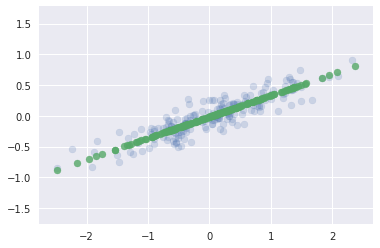

In [13]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

Les points clairs sont les données d'origine, tandis que les points sombres sont la version projetée.
Cela montre clairement ce que signifie une réduction de dimensionnalité PCA : les informations le long du ou des axes principaux les moins importants sont supprimées, ne laissant que le ou les composants des données avec la variance la plus élevée.
La fraction de variance qui est découpée (proportionnelle à la répartition des points autour de la ligne formée sur cette figure) est à peu près une mesure de la quantité "d'informations" qui est rejetée dans cette réduction de dimensionnalité.

Cet ensemble de données de dimension réduite est en quelque sorte "suffisamment bon" pour coder les relations les plus importantes entre les points : malgré la réduction de la dimension des données de 50 %, la relation globale entre les points de données est pour la plupart préservée.

### PCA pour la visualisation : Chiffres écrits à la main

L'utilité de la réduction de la dimensionnalité peut ne pas être entièrement apparente dans seulement deux dimensions, mais devient beaucoup plus claire lorsque l'on examine des données de grande dimension.
Pour voir cela, jetons un coup d'œil à l'application de l'ACP aux données numériques.

On commence par charger les données :

In [14]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Rappelons que les données sont constituées d'images de 8 × 8 pixels, ce qui signifie qu'elles sont en 64 dimensions.

Pour avoir une certaine intuition des relations entre ces points, nous pouvons utiliser l'ACP pour les projeter sur un nombre de dimensions plus gérable, disons deux :

In [15]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


Nous pouvons maintenant tracer les deux premières composantes principales de chaque point pour en savoir plus sur les données :

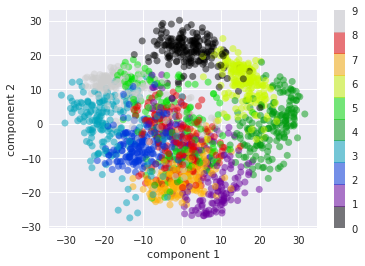

In [16]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Rappelez-vous ce que signifient ces composants : les données complètes sont un nuage de points à 64 dimensions, et ces points sont la projection de chaque point de données le long des directions avec la plus grande variance.
Essentiellement, nous avons trouvé l'étirement et la rotation optimaux dans un espace à 64 dimensions qui nous permettent de voir la disposition des chiffres en deux dimensions, et nous l'avons fait de manière non supervisée, c'est-à-dire sans référence aux étiquettes.

### Que signifient les composants ?

Nous pouvons aller un peu plus loin ici et commencer à nous demander ce que les dimensions réduites *signifient*.
Cette signification peut être comprise en termes de combinaisons de vecteurs de base.
Par exemple, chaque image de l'ensemble d'apprentissage est définie par une collection de 64 valeurs de pixels, que nous appellerons le vecteur $x$:

$$
x = [x_1, x_2, x_3 \cdots x_{64}]
$$

Une façon de penser à cela est en termes de base de pixels.
Autrement dit, pour construire l'image, nous multiplions chaque élément du vecteur par le pixel qu'il décrit, puis additionnons les résultats pour construire l'image :

$$
{\rm image}(x) = x_1 \cdot{\rm (pixel~1)} + x_2 \cdot{\rm (pixel~2)} + x_3 \cdot{\rm (pixel~3)} \cdots x_{64} \cdot{\rm (pixel~64)}
$$

Une façon que nous pourrions imaginer réduire la dimension de ces données consiste à mettre à zéro tous ces vecteurs de base, sauf quelques-uns.
Par exemple, si nous n'utilisons que les huit premiers pixels, nous obtenons une projection en huit dimensions des données, mais elle ne reflète pas très bien l'ensemble de l'image : nous avons rejeté près de 90 % des pixels !

#### Code caché

In [17]:
def plot_pca_components(x, coefficients=None, mean=0, components=None,
                        imshape=(8, 8), n_components=8, fontsize=12,
                        show_mean=True):
    if coefficients is None:
        coefficients = x
        
    if components is None:
        components = np.eye(len(coefficients), len(x))
        
    mean = np.zeros_like(x) + mean
        

    fig = plt.figure(figsize=(1.2 * (5 + n_components), 1.2 * 2))
    g = plt.GridSpec(2, 4 + bool(show_mean) + n_components, hspace=0.3)

    def show(i, j, x, title=None):
        ax = fig.add_subplot(g[i, j], xticks=[], yticks=[])
        ax.imshow(x.reshape(imshape), interpolation='nearest')
        if title:
            ax.set_title(title, fontsize=fontsize)

    show(slice(2), slice(2), x, "True")
    
    approx = mean.copy()
    
    counter = 2
    if show_mean:
        show(0, 2, np.zeros_like(x) + mean, r'$\mu$')
        show(1, 2, approx, r'$1 \cdot \mu$')
        counter += 1

    for i in range(n_components):
        approx = approx + coefficients[i] * components[i]
        show(0, i + counter, components[i], r'$c_{0}$'.format(i + 1))
        show(1, i + counter, approx,
             r"${0:.2f} \cdot c_{1}$".format(coefficients[i], i + 1))
        if show_mean or i > 0:
            plt.gca().text(0, 1.05, '$+$', ha='right', va='bottom',
                           transform=plt.gca().transAxes, fontsize=fontsize)

    show(slice(2), slice(-2, None), approx, "Approx")
    return fig

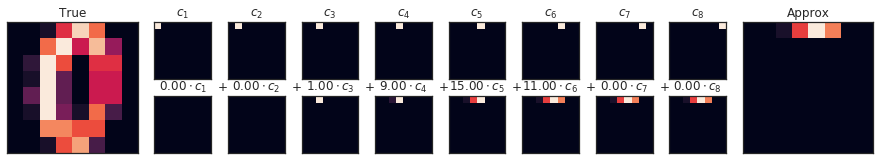

In [18]:
from sklearn.datasets import load_digits

digits = load_digits()
sns.set_style('white')

fig = plot_pca_components(digits.data[10],
                          show_mean=False)

fig.savefig('figures/05.09-digits-pixel-components.png')

#### ...

![](figures/05.09-digits-pixel-components.png)

![](figures/05.09-digits-pixel-components.png)

La rangée supérieure de panneaux montre les pixels individuels, et la rangée inférieure montre la contribution cumulée de ces pixels à la construction de l'image.
En utilisant seulement huit des composants à base de pixels, nous ne pouvons construire qu'une petite partie de l'image de 64 pixels.
Si nous devions continuer cette séquence et utiliser les 64 pixels, nous retrouverions l'image d'origine.

Mais la représentation pixel par pixel n'est pas le seul choix de base. Nous pouvons également utiliser d'autres fonctions de base, qui contiennent chacune une contribution prédéfinie de chaque pixel, et écrire quelque chose comme
$$
image(x) = {\rm mean} + x_1 \cdot{\rm (basis~1)} + x_2 \cdot{\rm (basis~2)} + x_3 \cdot{\rm (basis~3)} \cdots
$$

L'ACP peut être considérée comme un processus de choix de fonctions de base optimales, de sorte que l'addition de quelques-unes d'entre elles suffit à reconstruire de manière appropriée la majeure partie des éléments de l'ensemble de données.
Les composantes principales, qui agissent comme la représentation de faible dimension de nos données, sont simplement les coefficients qui multiplient chacun des éléments de cette série.
Cette figure montre une représentation similaire de la reconstruction de ce chiffre en utilisant la moyenne plus les huit premières fonctions de base PCA :

#### Code caché

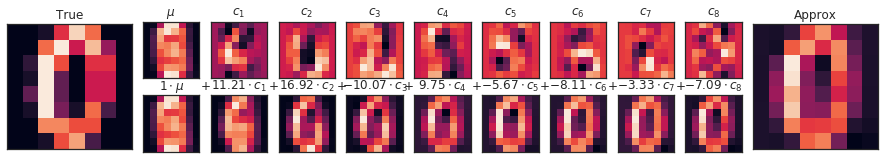

In [19]:
pca = PCA(n_components=8)
Xproj = pca.fit_transform(digits.data)
sns.set_style('white')
fig = plot_pca_components(digits.data[10], Xproj[10],
                          pca.mean_, pca.components_)

fig.savefig('figures/05.09-digits-pca-components.png')

#### ...

![](figures/05.09-digits-pca-components.png)

![](figures/05.09-digits-pca-components.png)

Contrairement à la base pixel, la base PCA nous permet de récupérer les caractéristiques saillantes de l'image d'entrée avec juste une moyenne plus huit composantes !
La quantité de chaque pixel dans chaque composant est le corollaire de l'orientation du vecteur dans notre exemple bidimensionnel.
C'est le sens dans lequel l'ACP fournit une représentation de faible dimension des données : elle découvre un ensemble de fonctions de base qui sont plus efficaces que la base de pixels native des données d'entrée.

### Choix du nombre de composants

Un élément essentiel de l'utilisation de l'ACP dans la pratique est la capacité d'estimer le nombre de composants nécessaires pour décrire les données.
Cela peut être déterminé en examinant le *rapport de variance expliquée* cumulé en fonction du nombre de composants :

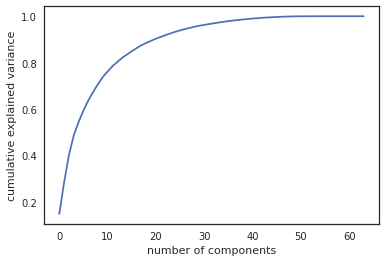

In [20]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Cette courbe quantifie la part de la variance totale à 64 dimensions contenue dans les premières composantes $N$.
Par exemple, on voit qu'avec les chiffres les 10 premiers composants contiennent environ 75% de la variance, alors qu'il faut environ 50 composants pour décrire près de 100% de la variance.

Ici, nous voyons que notre projection bidimensionnelle perd beaucoup d'informations (telles que mesurées par la variance expliquée) et qu'il nous faudrait environ 20 composants pour conserver 90 % de la variance. L'examen de ce graphique pour un ensemble de données de grande dimension peut vous aider à comprendre le niveau de redondance présent dans plusieurs observations.

## PCA comme filtrage du bruit

L'ACP peut également être utilisée comme approche de filtrage pour les données bruitées.
L'idée est la suivante : toute composante dont la variance est beaucoup plus grande que l'effet du bruit devrait être relativement peu affectée par le bruit.
Donc, si vous reconstruisez les données en utilisant uniquement le plus grand sous-ensemble de composants principaux, vous devriez de préférence conserver le signal et rejeter le bruit.

Voyons à quoi cela ressemble avec les données numériques.
Nous allons d'abord tracer plusieurs des données d'entrée sans bruit :

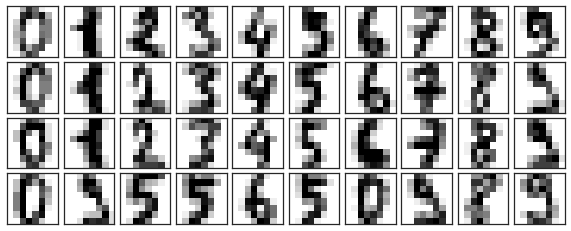

In [21]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

Ajoutons maintenant un peu de bruit aléatoire pour créer un jeu de données bruyant et retraçons-le :

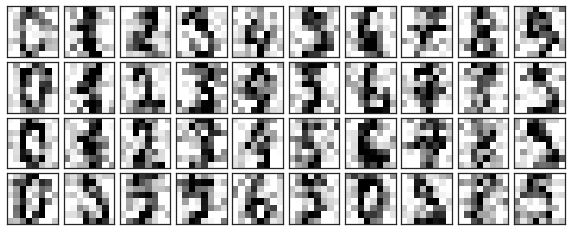

In [22]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

Il est clair à l'œil nu que les images sont bruyantes et contiennent des pixels parasites.
Entraînons une PCA sur les données bruitées, en demandant que la projection préserve 50 % de la variance :

In [23]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

Ici 50% de la variance équivaut à 12 composantes principales.
Nous calculons maintenant ces composants, puis utilisons l'inverse de la transformée pour reconstruire les chiffres filtrés :

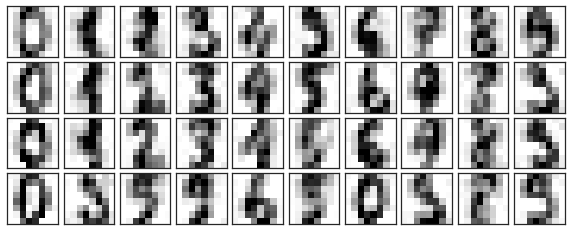

In [24]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

Cette propriété de préservation du signal/filtrage du bruit fait de l'ACP une routine de sélection de caractéristiques très utile. Par exemple, plutôt que de former un classificateur sur des données de très grande dimension, vous pouvez plutôt former le classificateur sur la représentation de dimension inférieure, qui servira automatiquement à filtrer bruit aléatoire dans les entrées.

## Exemple : faces propres

Précédemment, nous avons exploré un exemple d'utilisation d'une projection PCA comme sélecteur de caractéristiques pour la reconnaissance faciale avec une machine à vecteurs de support (voir [In-Depth : Support Vector Machines](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.07-Support-Vector-Machines.ipynb)).
Ici, nous allons revenir en arrière et explorer un peu plus ce qui s'est passé.
Rappelez-vous que nous utilisions l'ensemble de données Labeled Faces in the Wild mis à disposition via Scikit-Learn :

In [25]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Examinons les principaux axes qui couvrent cet ensemble de données.
Parce qu'il s'agit d'un grand ensemble de données, nous utiliserons ``RandomizedPCA`` - il contient une méthode randomisée pour approximer les premières composantes principales $N$ beaucoup plus rapidement que l'estimateur standard ``PCA``, et est donc très utile pour les hautes -données dimensionnelles (ici, une dimensionnalité de près de 3 000).
Nous allons jeter un œil aux 150 premiers composants :

In [26]:
#from sklearn.decomposition import RandomizedPCA
from sklearn.decomposition import PCA as RandomizedPCA
pca = RandomizedPCA(150)
pca.fit(faces.data)

PCA(n_components=150)

Dans ce cas, il peut être intéressant de visualiser les images associées aux quelques premières composantes principales (ces composantes sont techniquement appelées "vecteurs propres",
ces types d'images sont donc souvent appelés "faces propres").
Comme vous pouvez le voir sur cette figure, ils sont aussi effrayants qu'ils en ont l'air :

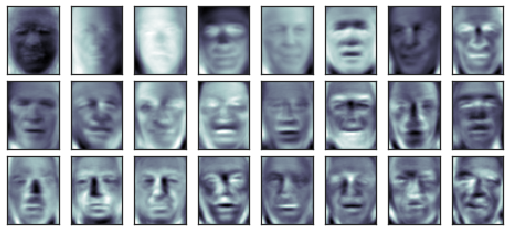

In [27]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

Les résultats sont très intéressants et nous donnent un aperçu de la façon dont les images varient : par exemple, les premières faces propres (en haut à gauche) semblent être associées à l'angle d'éclairage sur le visage, et les vecteurs principaux ultérieurs semblent être choisis certaines caractéristiques, telles que les yeux, le nez et les lèvres.
Examinons la variance cumulée de ces composants pour voir quelle quantité d'informations sur les données la projection conserve :

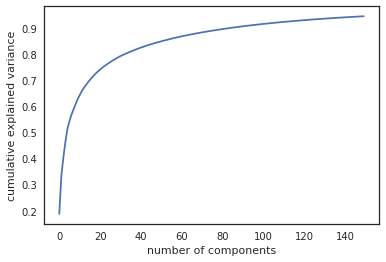

In [28]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

On voit que ces 150 composantes expliquent un peu plus de 90 % de la variance.
Cela laisserait croire qu'en utilisant ces 150 composants, on retrouverait la plupart des caractéristiques essentielles des données.
Pour rendre cela plus concret, on peut comparer les images d'entrée avec les images reconstruites à partir de ces 150 composants :

In [29]:
# Compute the components and projected faces
pca = RandomizedPCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

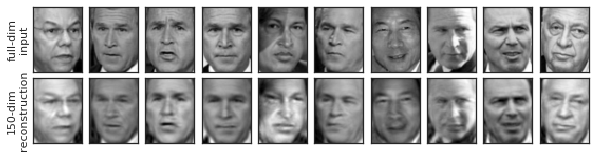

In [30]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

La rangée du haut montre ici les images d'entrée, tandis que la rangée du bas montre la reconstruction des images à partir de seulement 150 des ~ 3 000 caractéristiques initiales.
Cette visualisation montre clairement pourquoi la sélection de fonctionnalités PCA utilisée dans [In-Depth: Support Vector Machines](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.07-Support-Vector-Machines.ipynb) a été un tel succès : même si elle réduit la dimensionnalité des données de près d'un facteur 20, les images projetées contiennent suffisamment d'informations pour que nous puissions, à l'œil nu, reconnaître les individus dans l'image.
Cela signifie que notre algorithme de classification doit être formé sur des données à 150 dimensions plutôt qu'à 3 000 dimensions, ce qui, selon l'algorithme particulier que nous choisissons, peut conduire à une classification beaucoup plus efficace.

## Résumé de l'analyse en composantes principales

Dans cette section, nous avons discuté de l'utilisation de l'analyse en composantes principales pour la réduction de dimensionnalité, pour la visualisation de données de grande dimension, pour le filtrage du bruit et pour la sélection de caractéristiques dans des données de grande dimension.
En raison de la polyvalence et de l'interprétabilité de l'ACP, il s'est avéré efficace dans une grande variété de contextes et de disciplines.
Étant donné tout ensemble de données de grande dimension, j'ai tendance à commencer par l'ACP afin de visualiser la relation entre les points (comme nous l'avons fait avec les chiffres), de comprendre la principale variance des données (comme nous l'avons fait avec les faces propres) et de comprendre la dimensionnalité intrinsèque (en traçant le ratio de variance expliquée).
Certes, l'ACP n'est pas utile pour tous les ensembles de données de grande dimension, mais elle offre une voie simple et efficace pour mieux comprendre les données de grande dimension.

La principale faiblesse de l'ACP est qu'elle a tendance à être fortement affectée par les valeurs aberrantes dans les données.
Pour cette raison, de nombreuses variantes robustes de l'ACP ont été développées, dont beaucoup agissent pour éliminer de manière itérative les points de données qui sont mal décrits par les composants initiaux.
Scikit-Learn contient quelques variantes intéressantes sur PCA, y compris ``RandomizedPCA`` et ``SparsePCA``, toutes deux également dans le sous-module ``sklearn.decomposition``.
``RandomizedPCA``, que nous avons vu précédemment, utilise une méthode non déterministe pour approximer rapidement les premières composantes principales dans des données de très grande dimension, tandis que ``SparsePCA`` introduit un terme de régularisation (voir [In Depth: Linear Regression ](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.06-Linear-Regression.ipynb)) qui sert à appliquer la parcimonie des composants.

Dans les sections suivantes, nous examinerons d'autres méthodes d'apprentissage non supervisé qui s'appuient sur certaines des idées de l'ACP.



<!--NAVIGATION-->
< [In-Depth: Decision Trees and Random Forests](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.08-Random-Forests.ipynb) | [Contents](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/Index.ipynb) | [In-Depth: Manifold Learning](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.10-Manifold-Learning.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.09-Principal-Component-Analysis.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
